# LINEAR REGRESSION

In [1]:
import pandas as pd

dp = pd.read_excel('Rent Data.xlsx')


In [2]:
dp.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
dp.isnull().sum() # null valous chake

area    0
rent    0
dtype: int64

# DATA VSUALIZATION

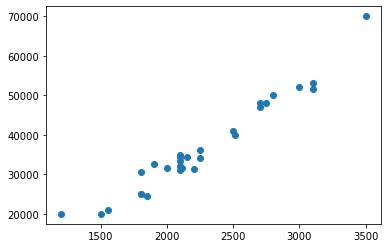

In [4]:
import matplotlib.pyplot as plt

plt.scatter(dp['area'],dp['rent'])



In [5]:
dp.area.mean()

2259.310344827586

In [6]:
dp.rent.mean()

36702.06896551724

Text(0.5, 1.0, 'Area Rent Table')

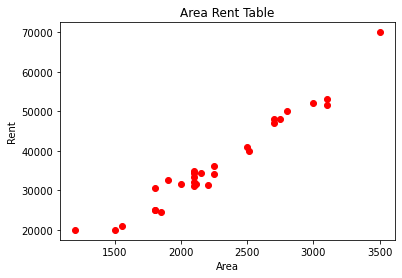

In [7]:
plt.scatter(dp['area'], dp['rent'],color='red',)
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Area Rent Table')

In [8]:
x = dp.drop('rent',axis=1) #rent delete

x

,area
0,2000
1,2100
2,2500
3,2250
4,3000
5,1900
6,1500
7,1850
8,2700
9,2100


In [9]:
y = dp['rent'] #Rent
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# TRAIN DATA TEST DATA

In [10]:
from sklearn.model_selection import train_test_split            
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=.30) 
#data chate thake model bag korlam test = 30 train = 70 standard

xtrain.shape

(20, 1)

In [11]:
xtest.shape #30%

(9, 1)

In [12]:
xtrain #70

,area
18,1800
27,1800
21,2100
11,2100
9,2100
3,2250
2,2500
5,1900
6,1500
28,2200


In [13]:
xtest

,area
1,2100
23,1200
7,1850
14,2250
13,2510
15,3100
4,3000
12,2100
22,3500


In [14]:
ytrain

18    25000
27    25000
21    33500
11    32000
9     31000
3     36100
2     41050
5     32500
6     20000
28    31460
24    50000
0     31500
26    48000
25    53000
20    31500
17    21000
19    47000
8     48000
16    30500
10    34500
Name: rent, dtype: int64

In [15]:
ytest

1     35000
23    20000
7     24500
14    34100
13    40050
15    51500
4     52100
12    34500
22    70000
Name: rent, dtype: int64

# LINEAR REGRESSIONG

In [16]:
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()

In [17]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
 m = lr.coef_

In [19]:
m

array([21.71399332])

In [20]:
c = lr.intercept_

c

-12542.572335877187

In [21]:
lr.predict([[1500]])

array([20028.41764536])

In [22]:
df = lr.predict(xtest)

In [23]:
dp['New Rent'] = lr.predict(x)

In [24]:
dp # kacakace valou peya gace

,area,rent,New Rent
0,2000,31500,30885.414306
1,2100,35000,33056.813638
2,2500,41050,41742.410966
3,2250,36100,36313.912636
4,3000,52100,52599.407627
5,1900,32500,28714.014974
6,1500,20000,20028.417645
7,1850,24500,27628.315308
8,2700,48000,46085.209630
9,2100,31000,33056.813638


In [25]:
dp.head(5)

,area,rent,New Rent
0,2000,31500,30885.414306
1,2100,35000,33056.813638
2,2500,41050,41742.410966
3,2250,36100,36313.912636
4,3000,52100,52599.407627


# ERROR

In [26]:
from sklearn.metrics import mean_squared_error

msc = mean_squared_error(ytest,xtest)


In [27]:
msc

1621991844.4444444

In [28]:
msc = mean_squared_error(ytest,df)

In [29]:
msc

13336054.258723276

In [30]:
import matplotlib.pyplot as plt


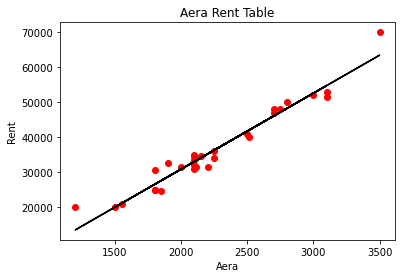

In [31]:
plt.scatter(dp['area'],dp['rent'] ,color=('red'))
plt.xlabel('Aera')
plt.ylabel('Rent')
plt.title('Aera Rent Table')
plt.plot(dp['area'],dp['New Rent'], color='black')



# SAVE ML MODEL


# JOBLIB

In [36]:
import joblib as jb

jb.dump(lr,'LINEAR MODEL')

['LINEAR MODEL']

In [37]:
model = jb.load('LINEAR MODEL')

In [38]:
model

LinearRegression()

In [39]:
model.predict([[2000]])

array([30885.41430578])